***importing necessary packages***

In [58]:
import numpy as np
import time
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Path for pre-trained model and sample image***

In [0]:
caffe_model_path = '/content/drive/My Drive/deep-learning-opencv/bvlc_googlenet.caffemodel'
image_path = '/content/drive/My Drive/deep-learning-opencv/images/traffic_light.png'
label = '/content/drive/My Drive/deep-learning-opencv/synset_words.txt'
deploy_protxt = '/content/drive/My Drive/deep-learning-opencv/bvlc_googlenet.prototxt'

***load the input image from drive***

In [60]:
image = cv2.imread(image_path)
image.shape

(500, 375, 3)

***load the class labels from drive***

In [0]:
rows = open(label).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

***our CNN requires fixed spatial dimensions for our input image(s) so we need to ensure:***
1. ***it is resized to*** ***224x224 pixels***
2. ***while performing mean subtraction (104, 117, 123) to normalize the input***
3. ***after executing this command our "blob" now has the shape: (1, 3, 224, 224)***

In [62]:
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))
blob.shape

(1, 3, 224, 224)

***load our trained model from drive***

In [0]:
net = cv2.dnn.readNetFromCaffe(deploy_protxt, caffe_model_path)

***set the blob as input to the network and perform a forward-pass to obtain our output classification***

In [64]:
net.setInput(blob)
start = time.time()
preds = net.forward()
end = time.time()
print("[INFO] classification took {:.5} seconds".format(end - start))

[INFO] classification took 0.13693 seconds


***sort the indexes of the probabilities in descending order (higher probabilitiy first) and grab the top-5 predictions***

In [0]:
idxs = np.argsort(preds[0])[::-1][:5]

In [0]:
img = image.copy()

***Loop over on top 5 prediction and desplaying name on the image itself***

[INFO] 1. label: traffic light, probability: 1.0
[INFO] 2. label: pole, probability: 7.7823e-09
[INFO] 3. label: street sign, probability: 7.9946e-10
[INFO] 4. label: abacus, probability: 1.7547e-11
[INFO] 5. label: cinema, probability: 1.2155e-11


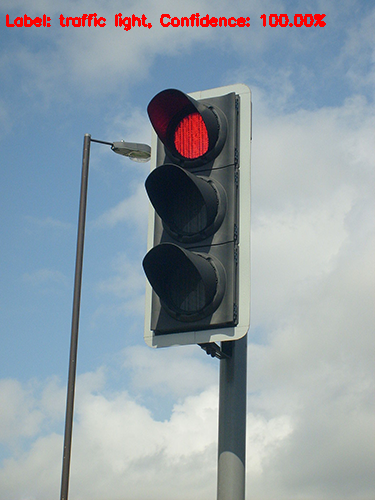

In [67]:
for (i, idx) in enumerate(idxs):
  if i == 0:
    text = "Label: {}, Confidence: {:.2f}%".format(classes[idx], preds[0][idx] * 100)
    cv2.putText(img, text, (5, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
  print("[INFO] {}. label: {}, probability: {:.5}".format(i + 1, classes[idx], preds[0][idx]))

cv2_imshow(img)